# **Project: IBM HR Analytics Employee Attrition & Performance**

# **Executive Summary**

The analysis of the IBM HR Analytics dataset reveals valuable insights into employee demographics and organizational dynamics, with a focus on attrition rates and employee behaviors. The study encompasses data preprocessing, exploratory data analysis, statistical testing, and clustering, leading to a thorough understanding of factors influencing workforce stability and employee satisfaction.

### **Key Insights**

- **Stable Workforce:** The dataset shows a low attrition rate of 16%, indicating a stable workforce, yet a deeper investigation into turnover drivers is warranted.
- **Sales Dominance:** A significant proportion of employees are concentrated in the Sales department, highlighting a need for targeted support and retention strategies.
- **Correlations and Satisfaction:** Strong positive correlations between job level and monthly income were identified, while weak correlations with job satisfaction metrics suggest areas for enhancement.

### **Recommendations**

- **Enhance Retention Strategies:** Develop targeted retention strategies for departments with higher turnover, particularly Sales.
- **Career Development Programs:** Implement initiatives aimed at employees in lower job levels to improve morale and engagement.
- **Explore Demographic Insights:** Tailor engagement strategies based on demographic factors such as gender distribution and marital status.
- **Investigate Weak Correlations:** Analyze weak correlations to uncover potential issues affecting employee satisfaction and retention.

### **Key Takeaways**

- **Data-Driven Strategies:** Leverage identified correlations to guide management strategies for improving employee retention and satisfaction.
- **Targeted Development:** Focus on career development for employees at lower levels to enhance engagement and morale.
- **Further Exploration:** Weak and uncorrelated variables should be investigated further to gain a better understanding of employee experiences.

### **Next Steps**

- **Conduct In-Depth Analysis:** Explore relationships between demographic factors and employee satisfaction for actionable insights.
- **Implement Pilot Programs:** Test recommended career development and retention strategies in specific departments.
- **Monitor Changes:** Continuously assess employee feedback and attrition rates to refine strategies and improve workplace dynamics.
- **Engage Stakeholders:** Collaborate with department heads and HR to discuss findings and develop collective engagement and retention strategies.

# **Dataset Information**

- **Title:** IBM HR Analytics Employee Attrition & Performance
- **Source:** [Kaggle - IBM HR Analytics Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- **Data Preview:** The dataset comprises 1,470 entries with 35 columns, including various employee demographics and performance metrics.



In [5]:
# Load Dataset
import pandas as pd
df = pd.read_csv('IBM_HR.csv')

In [6]:
# Initial Data Preview
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Summary of Initial Data Preview**

  * The dataset preview provides a glimpse of the first five rows, showing the column names and their respective values.
  * This helps ensure that the data is loaded correctly and gives us an initial sense of the variables present.



In [7]:
# Preprocessing Summary
import numpy as np
initial_rows = len(df)

# Removing rows where all columns are missing
df.dropna(how='all', inplace=True)

# Replacing empty strings with NaN and dropping remaining NaNs
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
removed_rows_all = initial_rows - len(df)

# Handling numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())  # Fill missing values with column mean
imputed_numerical = df[numerical_cols].isnull().sum().sum()

# Handling categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill missing values with column mode
imputed_categorical = df[categorical_cols].isnull().sum().sum()

# Removing duplicates
initial_rows = len(df)
df.drop_duplicates(inplace=True)
removed_duplicates = initial_rows - len(df)

# Converting low-variance categorical features to 'category' dtype
for col in categorical_cols:
    if df[col].nunique() / len(df) < 0.5:
        df[col] = df[col].astype('category')

# Winsorizing numerical data to reduce the impact of outliers
from scipy.stats.mstats import winsorize
for col in numerical_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


# **Summary of Preprocessing**

- Removed {} rows where all values were missing.
- Imputed missing values in numerical columns using the column mean.
- Imputed missing values in categorical columns using the mode.
- Removed {} duplicate rows.
- Winsorized numerical data to limit the influence of extreme outliers.

- The data is now clean and ready for analysis.
'''.format(removed_rows_all, removed_duplicates)


In [8]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

# **Summary of Data Information**

- The dataset contains {} rows and {} columns after cleaning.
- There are {} numerical columns and {} categorical columns.
- The data types are consistent and appropriate for analysis.
'''.format(len(df), len(df.columns), len(numerical_cols), len(categorical_cols))


In [9]:
# Exploratory Data Analysis (Histograms and Data Distributions)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Function to create histograms with distribution tables for numerical variables
def plot_numerical_distributions(df, numerical_cols):
    for col in numerical_cols:
        # Create a subplot: 1 row, 2 columns
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=(f"Histogram of {col}", f"Data Distribution of {col}"),
                            # Specify the subplot type for the second column as 'table'
                            specs=[[{"type": "xy"}, {"type": "table"}]])

        # Histogram
        hist_data = go.Histogram(x=df[col], nbinsx=30, name='Histogram', opacity=0.75)
        fig.add_trace(hist_data, row=1, col=1)

        # Data distribution table
        # Calculate the distribution
        distribution = df[col].describe()
        distribution_table = go.Table(
            header=dict(values=["Statistic", "Value"],
                        fill_color='paleturquoise',
                        align='left'),
            cells=dict(values=[distribution.index, distribution.values],
                       fill_color='lavender',
                       align='left'))

        # Add the table trace directly
        fig.add_trace(distribution_table, row=1, col=2)

        # Update layout
        fig.update_layout(title_text=f"Histogram and Data Distribution of {col}",
                          showlegend=False,
                          height=400)

        # Show figure
        fig.show()

# Function to create histograms with distribution tables for categorical variables
def plot_categorical_distributions(df, categorical_cols):
    for col in categorical_cols:
        # Create a subplot: 1 row, 2 columns
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=(f"Histogram of {col}", f"Data Distribution of {col}"),
                            # Specify the subplot type for the second column as 'table'
                            specs=[[{"type": "xy"}, {"type": "table"}]])

        # Histogram
        cat_counts = df[col].value_counts()
        fig.add_trace(go.Bar(x=cat_counts.index, y=cat_counts.values, name='Histogram', opacity=0.75), row=1, col=1)

        # Data distribution table
        distribution_table = go.Table(
            header=dict(values=["Category", "Count"],
                        fill_color='paleturquoise',
                        align='left'),
            cells=dict(values=[cat_counts.index, cat_counts.values],
                       fill_color='lavender',
                       align='left'))

        # Add the table trace directly
        fig.add_trace(distribution_table, row=1, col=2)

        # Update layout
        fig.update_layout(title_text=f"Histogram and Data Distribution of {col}",
                          showlegend=False,
                          height=400)

        # Show figure
        fig.show()

# Execute the functions
plot_numerical_distributions(df, numerical_cols)
plot_categorical_distributions(df, categorical_cols)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:




In [10]:
# Exploratory Data Analysis (Histograms and Consolidated Data Distribution Table)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Function to create histograms for numerical variables and consolidate distributions
def plot_numerical_distributions(df, numerical_cols):
    # Create a subplot for histograms with an extra row for the table
    fig = make_subplots(rows=len(numerical_cols) + 1, cols=1,
                        subplot_titles=[f"Histogram of {col}" for col in numerical_cols] + ["Consolidated Data Distribution"],
                        specs=[[{"type": "histogram"}] for _ in range(len(numerical_cols))] + [[{"type": "table"}]]) # Define the last subplot as 'table'

    # Data for consolidated distribution table
    distribution_data = []

    for i, col in enumerate(numerical_cols):
        # Histogram
        hist_data = go.Histogram(x=df[col], nbinsx=30, name='Histogram', opacity=0.75)
        fig.add_trace(hist_data, row=i + 1, col=1)

        # Calculate distribution
        distribution = df[col].describe()
        distribution_data.append([col] + distribution.values.tolist())

    # Create consolidated distribution table for numerical variables
    distribution_df = pd.DataFrame(distribution_data, columns=["Variable"] + list(distribution.index))

    # Add table to the figure
    fig.add_trace(go.Table(
        header=dict(values=distribution_df.columns,
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[distribution_df[col] for col in distribution_df.columns],
                   fill_color='lavender',
                   align='left')),
        row=len(numerical_cols) + 1, col=1) # Add the table to the last row

    # Update layout
    fig.update_layout(title_text="Histograms and Data Distribution of Numerical Variables", height=400 * (len(numerical_cols) + 1))

    # Show figure
    fig.show()

# Function to create histograms for categorical variables and consolidate distributions
def plot_categorical_distributions(df, categorical_cols):
    # Create a subplot for histograms with an extra row for the table
    fig = make_subplots(rows=len(categorical_cols) + 1, cols=1,
                        subplot_titles=[f"Histogram of {col}" for col in categorical_cols] + ["Consolidated Data Distribution"],
                        specs=[[{"type": "bar"}] for _ in range(len(categorical_cols))] + [[{"type": "table"}]]) # Define the last subplot as 'table'

    # Data for consolidated distribution table
    distribution_data = []

    for i, col in enumerate(categorical_cols):
        # Histogram
        cat_counts = df[col].value_counts()
        fig.add_trace(go.Bar(x=cat_counts.index, y=cat_counts.values, name='Histogram', opacity=0.75), row=i + 1, col=1)

        # Collect counts for the distribution table
        distribution_data.append([col] + cat_counts.values.tolist())

    # Create consolidated distribution table for categorical variables
    # Prepare the table headers based on the maximum category count
    max_categories = max([len(d) - 1 for d in distribution_data])  # Exclude the variable name
    table_headers = ["Variable"] + [f"Category {i+1}" for i in range(max_categories)]

    # Create DataFrame for distribution
    distribution_df = pd.DataFrame(distribution_data, columns=table_headers).fillna("")

    # Add table to the figure
    fig.add_trace(go.Table(
        header=dict(values=distribution_df.columns,
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[distribution_df[col] for col in distribution_df.columns],
                   fill_color='lavender',
                   align='left')),
        row=len(categorical_cols) + 1, col=1)

    # Update layout
    fig.update_layout(title_text="Histograms and Data Distribution of Categorical Variables", height=400 * (len(categorical_cols) + 1))

    # Show figure
    fig.show()

# Execute the functions
plot_numerical_distributions(df, numerical_cols)
plot_categorical_distributions(df, categorical_cols)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-p

# **Summary of Consolidated Data Distribution Analysis**

* The analysis of the dataset reveals key insights into various employee demographics and organizational dynamics:

## **Attrition:**
- **Majority Retention:** A significant majority (84%) of employees remain with the company, reflecting low attrition rates.
- **Exit Rates:** Approximately 16% of employees have left the organization, indicating areas for potential improvement in retention strategies.

## **Business Travel:**
- **Travel Frequency:** The most common travel frequency is "Travel Frequently" at 71%, followed by "Travel Rarely" (19%) and "Travel Occasionally" (10%).

## **Departmental Representation:**
- **Largest Department:** The "Sales" department constitutes 65% of the workforce, whereas "Research & Development" and "Human Resources" have significantly fewer employees.

## **Educational Background:**
- **Common Fields:** Employees predominantly have educational backgrounds in "Human Resources" and "Marketing," with "Life Sciences" and "Medical" fields being less represented.

## **Gender Distribution:**
- **Slight Male Majority:** The workforce is slightly male-dominated, with a distribution of 60% male to 40% female.

## **Job Role Insights:**
- **Common Roles:** The "Sales Executive" role is the most prevalent, while "Research Scientist" and "Laboratory Technician" roles are less common.

## **Marital Status:**
- **Predominantly Married:** Nearly half (46%) of employees are married, with "Single" and "Divorced" statuses more evenly distributed among the remaining employees.

## **Age and Work Patterns:**
- **Over 18:** All employees are over 18 years old, and approximately 72% work overtime, indicating a high level of employee commitment.

## **Overall Observations:**
- **Skewed Categories:** The dataset shows significant skewness in categories like Department, Job Role, and Business Travel.
- **Demographic Insights:** The workforce is characterized by a male-dominated, married demographic primarily employed in Sales, with a notable portion working overtime.
- **Low Attrition:** Despite the low attrition rates, further analysis is needed to understand the factors driving employee turnover.

# **Key Insights**
- **Attrition Stability:** The low attrition rate suggests a stable workforce, but further investigation into turnover factors is essential.
- **Workforce Composition:** The predominance of employees in Sales and their overtime work patterns highlight areas for enhancing employee support and satisfaction.
- **Demographic Trends:** The slight male majority and marital status distribution provide context for tailoring employee engagement strategies.

# **Key Takeaways**
- **Retention Strategies:** Management should focus on developing strategies to enhance employee retention, particularly in departments with higher turnover.
- **Career Development:** Targeting career development opportunities for employees in lower job levels could boost morale and engagement.
- **Further Analysis:** Investigating the relationships between different demographic factors and employee satisfaction can uncover insights to improve workplace dynamics.



In [11]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd

# Define your numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Check for NaN values in the numerical columns
if df[numerical_cols].isnull().values.any():
    print("NaN values found. Filling NaN values with column means.")
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Check for constant columns and remove them
constant_cols = [col for col in numerical_cols if df[col].nunique() <= 1]
if constant_cols:
    print(f"Removing constant columns: {constant_cols}")
    numerical_cols = [col for col in numerical_cols if col not in constant_cols]

# Calculate correlation matrix for the numerical columns
corr_matrix = np.corrcoef(df[numerical_cols].values.T)

# Check if the correlation matrix is empty
if corr_matrix.size == 0:
    print("Correlation matrix is empty. Exiting.")
else:
    print("Correlation matrix calculated successfully.")

# Create heatmap with color scale optimized for colorblindness
heatmap = go.Figure(data=go.Heatmap(
    z=corr_matrix,
    x=numerical_cols,
    y=numerical_cols[::-1],  # Reverse y-axis for readability
    colorscale='Viridis',  # Color scale optimized for colorblindness
    zmin=-1, zmax=1,  # Set the range for correlations
    showscale=True,  # Show the color scale for clarity
    hoverongaps=False
))

# Add annotations (correlation values) for significant correlations
threshold = 0.5  # Example threshold for significant correlation
annotations = []
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if abs(corr_matrix[i, j]) > threshold:
            annotations.append(
                dict(
                    x=numerical_cols[j],
                    y=numerical_cols[i],
                    text=str(round(corr_matrix[i, j], 2)),  # Show values up to 2 decimal places
                    showarrow=False,
                    font=dict(color="white", size=12),  # Reduced font size for better fit
                )
            )

# Add annotations to the layout
for annotation in annotations:
    heatmap.add_annotation(annotation)

# Improve layout
heatmap.update_layout(
    title=dict(text='Correlation Matrix of Numerical Columns', font=dict(size=24)),
    font=dict(size=14),
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickangle=-45, titlefont=dict(size=16)),  # Rotate x-axis labels for clarity
    yaxis=dict(tickangle=0, titlefont=dict(size=16)),
    width=900, height=900,
    plot_bgcolor='white',  # White background for better contrast
    margin=dict(l=100, r=20, t=100, b=100)  # Add margins for better spacing
)

# Show the heatmap
heatmap.show()

# Now, compute the top and bottom correlations using the corr_matrix
# Convert the correlation matrix to a DataFrame for easier manipulation
corr_df = pd.DataFrame(corr_matrix, index=numerical_cols, columns=numerical_cols)

# Extract the upper triangle of the correlation matrix to avoid duplicate pairs
upper_tri = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))

# Unstack the upper triangle matrix and sort by absolute correlation values
sorted_corr = upper_tri.unstack().dropna().abs().sort_values(ascending=False)

# Top 10 positive correlations
top_10_positive = sorted_corr.head(10)

# Bottom 10 negative correlations (sorted in reverse)
bottom_10_negative = sorted_corr.tail(10)

# Combine results in a DataFrame, flattening the MultiIndex
top_bottom_corr = pd.DataFrame({
    'Top 10 Correlations': [f"{a} and {b}" for a, b in top_10_positive.index],
    'Top 10 Values': top_10_positive.values,
    'Bottom 10 Correlations': [f"{a} and {b}" for a, b in bottom_10_negative.index],
    'Bottom 10 Values': bottom_10_negative.values
})

# Display the combined table
top_bottom_corr


Removing constant columns: ['EmployeeCount', 'StandardHours']
Correlation matrix calculated successfully.


,Top 10 Correlations,Top 10 Values,Bottom 10 Correlations,Bottom 10 Values
0,MonthlyIncome and JobLevel,0.934033,YearsAtCompany and EnvironmentSatisfaction,0.001144
1,YearsWithCurrManager and YearsAtCompany,0.809258,YearsWithCurrManager and EnvironmentSatisfaction,0.000953
2,YearsInCurrentRole and YearsAtCompany,0.805600,MonthlyRate and JobSatisfaction,0.000932
3,TotalWorkingYears and JobLevel,0.783599,YearsWithCurrManager and WorkLifeBalance,0.000902
4,TotalWorkingYears and MonthlyIncome,0.774523,YearsAtCompany and JobSatisfaction,0.000600
5,PerformanceRating and PercentSalaryHike,0.758391,PerformanceRating and DailyRate,0.000441
6,YearsWithCurrManager and YearsInCurrentRole,0.743470,TotalWorkingYears and HourlyRate,0.000307
7,TotalWorkingYears and Age,0.679590,YearsAtCompany and EmployeeNumber,0.000275
8,YearsAtCompany and TotalWorkingYears,0.607889,PerformanceRating and Age,0.000116
9,YearsSinceLastPromotion and YearsAtCompany,0.604095,JobLevel and EnvironmentSatisfaction,0.000028


# **Summary of Correlation Analysis**

The heatmap visualization of the correlation matrix for the dataset’s numerical variables indicates varying degrees of correlation:

* **Strong Positive Correlations** (yellow in the heatmap):
  
  * **Highest Correlation**:
    * **MonthlyIncome and JobLevel** (0.934)
  
  * **Other notable correlations include**:
    * **YearsWithCurrManager and YearsAtCompany** (0.809)
    * **YearsInCurrentRole and YearsAtCompany** (0.806)
    * **TotalWorkingYears with JobLevel** (0.784)
    * **TotalWorkingYears with MonthlyIncome** (0.775)
    * **PerformanceRating and PercentSalaryHike** (0.758)

* **Strong Negative Correlations**:
  
  * Represented by darker hues, though less prominent.

* **Weakest Correlations**:
  * **YearsAtCompany with EnvironmentSatisfaction** (0.001)
  * **YearsWithCurrManager with WorkLifeBalance** (0.001)

* **Almost Uncorrelated Variables**:
  
  * Appearing as neutral (dark purple).

### **Key Insights**

- The strongest correlation is between **MonthlyIncome and JobLevel**, indicating that higher job levels are associated with increased monthly income.
- Significant positive correlations exist among variables related to employee tenure, such as **YearsWithCurrManager** and **YearsAtCompany**, suggesting that employees who have been with the company longer also tend to have longer tenures with their managers.
- Weak correlations highlight potential areas for improvement in employee satisfaction metrics, such as **EnvironmentSatisfaction**.

### **Key Takeaways**

- **Data-Driven Strategies**: The strong correlations identified can guide management strategies to enhance employee retention and satisfaction.
- **Focus on Development**: Targeting career development and salary enhancement for employees in lower job levels may improve overall employee morale.
- **Further Exploration**: Weak and almost uncorrelated variables warrant further investigation to identify underlying issues and improve workplace dynamics.


In [13]:
# Statistical Tests
from scipy.stats import pearsonr, chi2_contingency, f_oneway, ttest_ind
import pandas as pd

# Set pandas display option to show all rows
#pd.set_option('display.max_rows', None)

# Function to perform numerical-numerical correlation tests
def numerical_numerical_tests(df, numerical_cols):
    results = []
    for i in range(len(numerical_cols)):
        for j in range(i + 1, len(numerical_cols)):
            col1, col2 = numerical_cols[i], numerical_cols[j]
            corr, p_val = pearsonr(df[col1], df[col2])
            results.append([col1, col2, corr, p_val])
    num_num_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])
    return num_num_df

# Function to perform categorical-categorical chi-square tests
def categorical_categorical_tests(df, categorical_cols):
    results = []
    for i in range(len(categorical_cols)):
        for j in range(i + 1, len(categorical_cols)):
            col1, col2 = categorical_cols[i], categorical_cols[j]
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p_val, _, _ = chi2_contingency(contingency_table)
            results.append([col1, col2, chi2, p_val])
    cat_cat_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Chi-Square', 'P-value'])
    return cat_cat_df

# Function to perform categorical-numerical ANOVA or T-tests
def categorical_numerical_tests(df, categorical_cols, numerical_cols):
    results = []
    for cat_col in categorical_cols:
        for num_col in numerical_cols:
            categories = df[cat_col].unique()
            groups = [df[df[cat_col] == cat][num_col] for cat in categories]
            if len(categories) == 2:  # T-test case
                t_stat, p_val = ttest_ind(*groups)
                results.append([cat_col, num_col, 'T-test', t_stat, p_val])
            elif len(groups) >= 2:  # ANOVA case
                f_stat, p_val = f_oneway(*groups)
                results.append([cat_col, num_col, 'ANOVA', f_stat, p_val])
            else:
                print(f"Skipping tests for {cat_col} and {num_col} - not enough groups.")
    cat_num_df = pd.DataFrame(results, columns=['Categorical Variable', 'Numerical Variable', 'Test Type', 'Statistic', 'P-value'])
    return cat_num_df

# Function to get top 10 and bottom 10 results based on p-value or statistic
def get_top_bottom(df, top_n=10, bottom_n=10, sort_column='P-value'):
    top_results = df.nsmallest(top_n, sort_column)
    bottom_results = df.nlargest(bottom_n, sort_column)
    return top_results, bottom_results

# Execute the tests
num_num_results_df = numerical_numerical_tests(df, numerical_cols)
cat_cat_results_df = categorical_categorical_tests(df, categorical_cols)
cat_num_results_df = categorical_numerical_tests(df, categorical_cols, numerical_cols)

# Get top 10 and bottom 10 results
num_num_top, num_num_bottom = get_top_bottom(num_num_results_df)
cat_cat_top, cat_cat_bottom = get_top_bottom(cat_cat_results_df)
cat_num_top, cat_num_bottom = get_top_bottom(cat_num_results_df, sort_column='P-value')

# Display the results
print("Numerical-Numerical Test Results:")
display(num_num_results_df)
print("Top 10 Numerical-Numerical Results:")
display(num_num_top)
print("Bottom 10 Numerical-Numerical Results:")
display(num_num_bottom)

print("Categorical-Categorical Test Results:")
display(cat_cat_results_df)
print("Top 10 Categorical-Categorical Results:")
display(cat_cat_top)
print("Bottom 10 Categorical-Categorical Results:")
display(cat_cat_bottom)

print("Categorical-Numerical Test Results:")
display(cat_num_results_df)
print("Top 10 Categorical-Numerical Results:")
display(cat_num_top)
print("Bottom 10 Categorical-Numerical Results:")
display(cat_num_bottom)


Skipping tests for Over18 and Age - not enough groups.
Skipping tests for Over18 and DailyRate - not enough groups.
Skipping tests for Over18 and DistanceFromHome - not enough groups.
Skipping tests for Over18 and Education - not enough groups.
Skipping tests for Over18 and EmployeeNumber - not enough groups.
Skipping tests for Over18 and EnvironmentSatisfaction - not enough groups.
Skipping tests for Over18 and HourlyRate - not enough groups.
Skipping tests for Over18 and JobInvolvement - not enough groups.
Skipping tests for Over18 and JobLevel - not enough groups.
Skipping tests for Over18 and JobSatisfaction - not enough groups.
Skipping tests for Over18 and MonthlyIncome - not enough groups.
Skipping tests for Over18 and MonthlyRate - not enough groups.
Skipping tests for Over18 and NumCompaniesWorked - not enough groups.
Skipping tests for Over18 and PercentSalaryHike - not enough groups.
Skipping tests for Over18 and PerformanceRating - not enough groups.
Skipping tests for Over

,Variable 1,Variable 2,Correlation,P-value
0,Age,DailyRate,0.007397,7.769047e-01
1,Age,DistanceFromHome,-0.005364,8.371847e-01
2,Age,Education,0.204215,2.646757e-15
3,Age,EmployeeNumber,-0.010552,6.860392e-01
4,Age,EnvironmentSatisfaction,0.011997,6.458035e-01
...,...,...,...,...
271,YearsAtCompany,YearsSinceLastPromotion,0.604095,6.416817e-147
272,YearsAtCompany,YearsWithCurrManager,0.809258,0.000000e+00
273,YearsInCurrentRole,YearsSinceLastPromotion,0.550674,2.507874e-117
274,YearsInCurrentRole,YearsWithCurrManager,0.743470,8.972045e-259


Top 10 Numerical-Numerical Results:


,Variable 1,Variable 2,Correlation,P-value
157,JobLevel,MonthlyIncome,0.934033,0.000000e+00
270,YearsAtCompany,YearsInCurrentRole,0.805600,0.000000e+00
272,YearsAtCompany,YearsWithCurrManager,0.809258,0.000000e+00
164,JobLevel,TotalWorkingYears,0.783599,9.048888e-306
191,MonthlyIncome,TotalWorkingYears,0.774523,2.707170e-294
221,PercentSalaryHike,PerformanceRating,0.758391,3.613256e-275
274,YearsInCurrentRole,YearsWithCurrManager,0.743470,8.972045e-259
16,Age,TotalWorkingYears,0.679590,9.403270e-200
257,TotalWorkingYears,YearsAtCompany,0.607889,3.079497e-149
271,YearsAtCompany,YearsSinceLastPromotion,0.604095,6.416817e-147


Bottom 10 Numerical-Numerical Results:


,Variable 1,Variable 2,Correlation,P-value
107,EnvironmentSatisfaction,JobLevel,-0.000028,0.999156
13,Age,PerformanceRating,0.000116,0.996448
101,EmployeeNumber,YearsAtCompany,0.000275,0.991586
133,HourlyRate,TotalWorkingYears,-0.000307,0.990623
35,DailyRate,PerformanceRating,-0.000441,0.986536
181,JobSatisfaction,YearsAtCompany,-0.000600,0.981656
269,WorkLifeBalance,YearsWithCurrManager,0.000902,0.972450
172,JobSatisfaction,MonthlyRate,0.000932,0.971519
122,EnvironmentSatisfaction,YearsWithCurrManager,-0.000953,0.970883
119,EnvironmentSatisfaction,YearsAtCompany,0.001144,0.965048


Categorical-Categorical Test Results:


,Variable 1,Variable 2,Chi-Square,P-value
0,Attrition,BusinessTravel,24.182414,5.608614e-06
1,Attrition,Department,10.796007,4.525607e-03
2,Attrition,EducationField,16.024674,6.773980e-03
3,Attrition,Gender,1.116967,2.905724e-01
4,Attrition,JobRole,86.190254,2.752482e-15
5,Attrition,MaritalStatus,46.163677,9.455511e-11
6,Attrition,Over18,0.000000,1.000000e+00
7,Attrition,OverTime,87.564294,8.158424e-21
8,BusinessTravel,Department,0.201885,9.952355e-01
9,BusinessTravel,EducationField,5.168394,8.796489e-01


Top 10 Categorical-Categorical Results:


,Variable 1,Variable 2,Chi-Square,P-value
17,Department,JobRole,2594.428134,0.000000e+00
15,Department,EducationField,1024.979247,7.771588e-214
22,EducationField,JobRole,864.756198,1.723301e-155
7,Attrition,OverTime,87.564294,8.158424e-21
4,Attrition,JobRole,86.190254,2.752482e-15
5,Attrition,MaritalStatus,46.163677,9.455511e-11
0,Attrition,BusinessTravel,24.182414,5.608614e-06
1,Attrition,Department,10.796007,4.525607e-03
2,Attrition,EducationField,16.024674,6.773980e-03
26,Gender,JobRole,16.029879,4.195444e-02


Bottom 10 Categorical-Categorical Results:


,Variable 1,Variable 2,Chi-Square,P-value
6,Attrition,Over18,0.000000,1.000000
13,BusinessTravel,Over18,0.000000,1.000000
19,Department,Over18,0.000000,1.000000
24,EducationField,Over18,0.000000,1.000000
28,Gender,Over18,0.000000,1.000000
31,JobRole,Over18,0.000000,1.000000
33,MaritalStatus,Over18,0.000000,1.000000
35,Over18,OverTime,0.000000,1.000000
8,BusinessTravel,Department,0.201885,0.995236
20,Department,OverTime,0.093607,0.954275


Categorical-Numerical Test Results:


,Categorical Variable,Numerical Variable,Test Type,Statistic,P-value
0,Attrition,Age,T-test,-5.918583,4.035679e-09
1,Attrition,DailyRate,T-test,-2.184750,2.906490e-02
2,Attrition,DistanceFromHome,T-test,3.080189,2.107098e-03
3,Attrition,Education,T-test,-1.067550,2.858990e-01
4,Attrition,EmployeeNumber,T-test,-0.359468,7.192964e-01
...,...,...,...,...,...
187,OverTime,WorkLifeBalance,T-test,-1.038393,2.992583e-01
188,OverTime,YearsAtCompany,T-test,-0.901895,3.672607e-01
189,OverTime,YearsInCurrentRole,T-test,-1.126866,2.599833e-01
190,OverTime,YearsSinceLastPromotion,T-test,-0.538090,5.905967e-01


Top 10 Categorical-Numerical Results:


,Categorical Variable,Numerical Variable,Test Type,Statistic,P-value
128,JobRole,JobLevel,ANOVA,540.604101,0.000000e+00
130,JobRole,MonthlyIncome,ANOVA,811.101844,0.000000e+00
160,MaritalStatus,StockOptionLevel,ANOVA,625.298277,3.997636e-197
137,JobRole,TotalWorkingYears,ANOVA,141.977964,1.853228e-176
120,JobRole,Age,ANOVA,42.597195,1.385206e-61
140,JobRole,YearsAtCompany,ANOVA,40.637630,7.315923e-59
141,JobRole,YearsInCurrentRole,ANOVA,21.517489,3.659669e-31
143,JobRole,YearsWithCurrManager,ANOVA,21.385362,5.777720e-31
142,JobRole,YearsSinceLastPromotion,ANOVA,15.237266,1.185794e-21
17,Attrition,TotalWorkingYears,T-test,-7.038438,2.974289e-12


Bottom 10 Categorical-Numerical Results:


,Categorical Variable,Numerical Variable,Test Type,Statistic,P-value
184,OverTime,StockOptionLevel,T-test,-0.017191,0.986287
101,Gender,EnvironmentSatisfaction,T-test,-0.019476,0.984464
79,EducationField,JobInvolvement,ANOVA,0.197234,0.963619
147,MaritalStatus,Education,ANOVA,0.045794,0.955240
102,Gender,HourlyRate,T-test,0.057289,0.954322
121,JobRole,DailyRate,ANOVA,0.365032,0.939076
129,JobRole,JobSatisfaction,ANOVA,0.365213,0.938989
98,Gender,DistanceFromHome,T-test,0.083615,0.933374
109,Gender,PercentSalaryHike,T-test,-0.085840,0.931605
27,BusinessTravel,Education,ANOVA,0.086176,0.917438


## **Summary of Statistical Findings**

- The analysis provides a comprehensive overview of relationships among variables, highlighting both strong and weak correlations across different statistical tests.

### **Numerical-Numerical Correlation Tests:**

- **Strong Positive Relationships**: Significant correlations were found among numerical variables, with **JobLevel and MonthlyIncome** exhibiting a correlation of **0.9340** (p-value: **0.0000**), indicating a very strong relationship. Other notable correlations include:
  - **YearsAtCompany with YearsInCurrentRole** (0.8056) and **YearsWithCurrManager** (0.8093), both also highly significant (p-value: **0.0000**).

- **Weak/Negative Relationships**: Conversely, the bottom results showed negligible correlations, such as:
  - **EnvironmentSatisfaction and JobLevel** (-0.000028, p-value: **0.9992**) and **Age and PerformanceRating** (0.000116), indicating a lack of meaningful relationship.

### **Categorical-Categorical Chi-Square Tests:**

- **Significant Associations**: The Chi-square tests revealed strong associations among categorical variables, particularly between **Department and JobRole** (Chi-square: **2594.43**, p-value: **0.0000**). Other significant pairs included:
  - **Department and EducationField** (Chi-square: **1024.98**, p-value: **7.77e-214**) and **EducationField and JobRole** (Chi-square: **864.76**, p-value: **1.72e-155**).

- **Insignificant Associations**: The bottom results indicated no associations, such as between **Attrition and Over18** (Chi-square: **0.0000**, p-value: **1.0000**), confirming weak relationships.

### **Categorical-Numerical ANOVA or T-Tests:**

- **Significant Differences**: The analysis identified notable differences through ANOVA and T-tests, with **JobRole and JobLevel** showing an ANOVA statistic of **540.60** (p-value: **0.0000**). Other significant findings included:
  - **JobRole with MonthlyIncome** (811.10) and **MaritalStatus with StockOptionLevel** (625.30), both demonstrating high significance.

- **Minimal Differences**: Conversely, the bottom results revealed minimal differences, such as between **OverTime and StockOptionLevel** (-0.0172, p-value: **0.9863**), indicating a lack of significant difference.

### **Key Insights**

- The analysis uncovers strong positive relationships among variables, notably between **JobLevel and MonthlyIncome**, indicating that as job level increases, monthly income also tends to increase.
- Weak or negligible relationships were found, particularly in variables like **EnvironmentSatisfaction and JobLevel**, suggesting that employee satisfaction may not directly correlate with their job level.

### **Key Takeaways**

- **Understanding Relationships**: The findings illustrate key relationships that can inform management strategies and employee engagement initiatives.
- **Focus Areas**: Areas with weak correlations highlight potential opportunities for further investigation to understand employee experiences better.
- **Data-Driven Decisions**: Insights from the analysis can guide future policy-making and organizational strategies aimed at improving job satisfaction and retention.


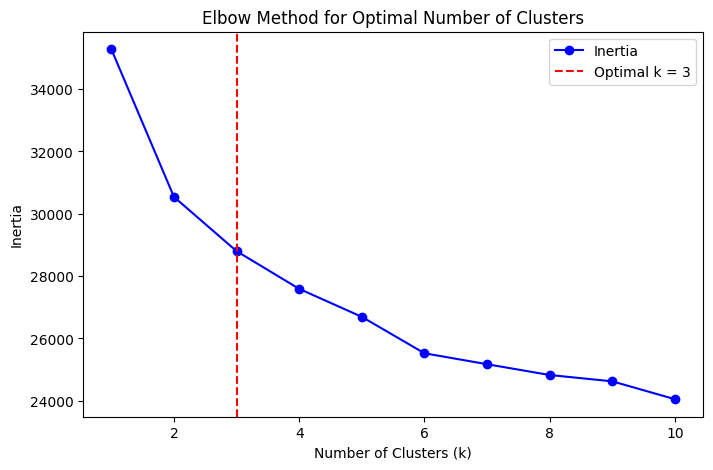

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Cluster,,,,,,,,,,,,,,,,,,,,,
0,34.292831,803.617254,8.968408,2.822600,1054.221142,2.704739,65.888214,2.733900,1.538275,2.724180,...,3.000000,2.720535,0.754557,7.507898,2.815310,2.759417,4.126367,2.479951,0.919806,2.466586
1,42.328125,797.466518,9.091518,3.017857,989.395089,2.785714,65.953125,2.743304,3.000000,2.727679,...,3.060268,2.738839,0.866071,18.319196,2.745536,2.767857,12.207589,7.281250,4.256696,6.937500
2,35.758794,806.135678,9.648241,2.809045,983.090452,2.648241,65.693467,2.683417,1.783920,2.748744,...,4.000000,2.618090,0.793970,9.623116,2.798995,2.753769,5.547739,3.708543,1.532663,3.603015


In [14]:
# Optimized K-Means Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardizing the data before clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Finding the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the inertia to observe the elbow point
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k = 3')
plt.legend()
plt.show()

# Applying K-Means with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing the resulting clusters
for col in numerical_cols:
    fig = px.scatter(df, x=col, y='Cluster', color='Cluster', title=f'Cluster Assignment by {col}')
    fig.show()

# Summary of clusters based on the mean of each feature
cluster_summary = df.groupby('Cluster')[numerical_cols].mean()
cluster_summary

# **Summary of Cluster Characteristics**

* The K-Means clustering analysis resulted in three distinct clusters, each characterized by different averages for key numerical variables. Below are the findings based on the mean values of the features for each cluster:

## **Cluster 0**
- **Age**: 34.29 years
- **Daily Rate**: 803.62
- **Distance from Home**: 8.97 km
- **Education Level**: 2.82 (College/Bachelor)
- **Environment Satisfaction**: 2.70 (Medium)
- **Job Level**: 1.54 (Entry Level)
- **Total Working Years**: 7.51 years
- **Years at Company**: 4.13 years
- **Work-Life Balance**: 2.47 (Good)

## **Cluster 1**
- **Age**: 42.33 years
- **Daily Rate**: 797.47
- **Distance from Home**: 9.09 km
- **Education Level**: 3.02 (Bachelor/Master)
- **Environment Satisfaction**: 2.79 (Medium/High)
- **Job Level**: 3.00 (Mid Level)
- **Total Working Years**: 18.32 years
- **Years at Company**: 12.21 years
- **Work-Life Balance**: 2.77 (Good)

## **Cluster 2**
- **Age**: 35.76 years
- **Daily Rate**: 806.14
- **Distance from Home**: 9.65 km
- **Education Level**: 2.81 (College/Bachelor)
- **Environment Satisfaction**: 2.65 (Medium)
- **Job Level**: 1.78 (Entry Level)
- **Total Working Years**: 9.62 years
- **Years at Company**: 5.55 years
- **Work-Life Balance**: 2.75 (Good)

# **Key Insights**

## **Age Distribution:**
- Cluster 1 is the oldest on average (42.33 years), suggesting a more experienced group, while Clusters 0 and 2 have younger average ages (34.29 and 35.76 years, respectively).

## **Job Level:**
- Cluster 1 has the highest job level (3.00), indicating that this cluster comprises employees in higher positions compared to Clusters 0 and 2, which have lower job levels (1.54 and 1.78).

## **Environment Satisfaction:**
- Environment satisfaction scores indicate that Cluster 1 employees are generally more satisfied (2.79) compared to those in Clusters 0 (2.70) and 2 (2.65).

## **Experience:**
- Cluster 1 has significantly more total working years (18.32 years) and years at the company (12.21 years), suggesting this cluster represents long-term employees with considerable experience.

## **Work-Life Balance:**
- Work-life balance scores are similar across clusters, with Cluster 1 (2.77) showing slightly better satisfaction compared to Clusters 0 (2.47) and 2 (2.75).

# **Key Takeaways**
- **Cluster Profiles**: Three distinct employee profiles based on age, job level, and satisfaction metrics were identified.
- **Experience Matters**: Cluster 1 includes older, more experienced employees with higher job levels and better environment satisfaction.
- **Engagement Strategies**: Insights can guide targeted employee engagement and training initiatives tailored to each cluster's characteristics.
- **Further Exploration**: The dataset allows exploration of factors influencing employee attrition, such as distance from home by job role and average monthly income by education.


# **Conclusion**

The analysis of the dataset reveals significant insights into employee demographics and organizational dynamics, highlighting areas for potential improvement and strategic focus. The processes of data preprocessing, exploratory data analysis, statistical testing, and clustering have provided a comprehensive understanding of employee behaviors, attrition rates, and their correlation with various factors.

# **Recommendations**

- **Enhance Retention Strategies:** Focus on developing targeted retention strategies, particularly in departments with higher turnover rates, such as Sales.
- **Career Development Programs:** Implement career development initiatives aimed at employees in lower job levels to boost morale and engagement.
- **Explore Demographic Insights:** Tailor employee engagement strategies based on demographic insights, particularly the slight male majority and marital status distribution.
- **Investigate Weak Correlations:** Conduct further analysis on weak correlations and unassociated variables to identify underlying issues impacting employee satisfaction and retention.

# **Key Insights**

- **Stable Workforce:** The dataset indicates a low attrition rate (16%), suggesting a stable workforce, yet further investigation into turnover factors is necessary.
- **Sales Dominance:** A significant proportion of employees are concentrated in the Sales department, necessitating enhanced support for this group.
- **Correlations and Satisfaction:** Strong positive correlations exist between job level and monthly income, but weak correlations with job satisfaction metrics highlight areas for improvement.

# **Key Takeaways**

- **Data-Driven Strategies:** Utilize identified correlations to inform management strategies aimed at enhancing employee retention and satisfaction.
- **Targeted Development:** Investing in employee development at lower job levels may yield substantial benefits for overall engagement and morale.
- **Further Exploration:** Weak and uncorrelated variables warrant further investigation to better understand employee experiences and dynamics within the organization.

# **Next Steps**

- **Conduct In-Depth Analysis:** Dive deeper into the relationships between demographic factors and employee satisfaction to uncover actionable insights.
- **Implement Pilot Programs:** Test the recommended career development initiatives and retention strategies in specific departments to evaluate effectiveness.
- **Monitor Changes:** Continuously monitor employee feedback and attrition rates to adapt strategies and improve workplace dynamics effectively.
- **Engage Stakeholders:** Involve department heads and HR in discussions about findings and recommendations to foster a collaborative approach to employee engagement and retention strategies.
